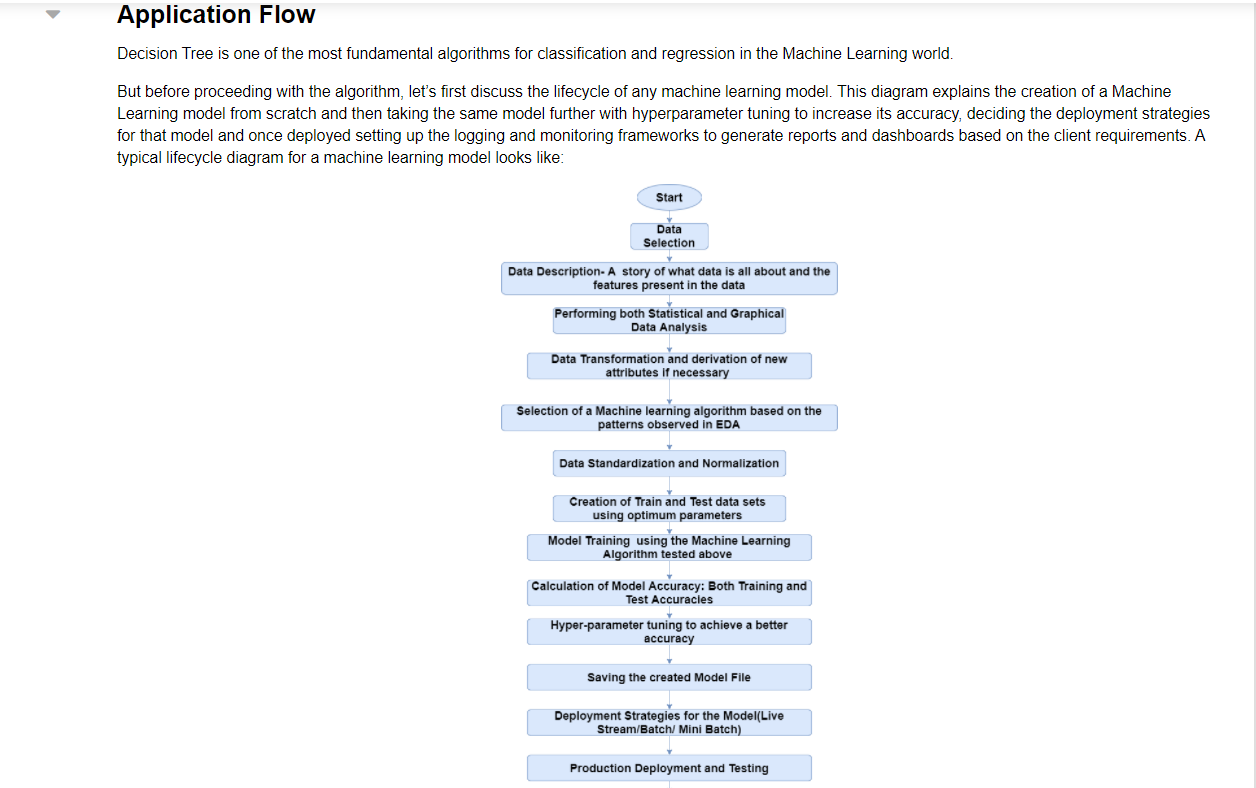
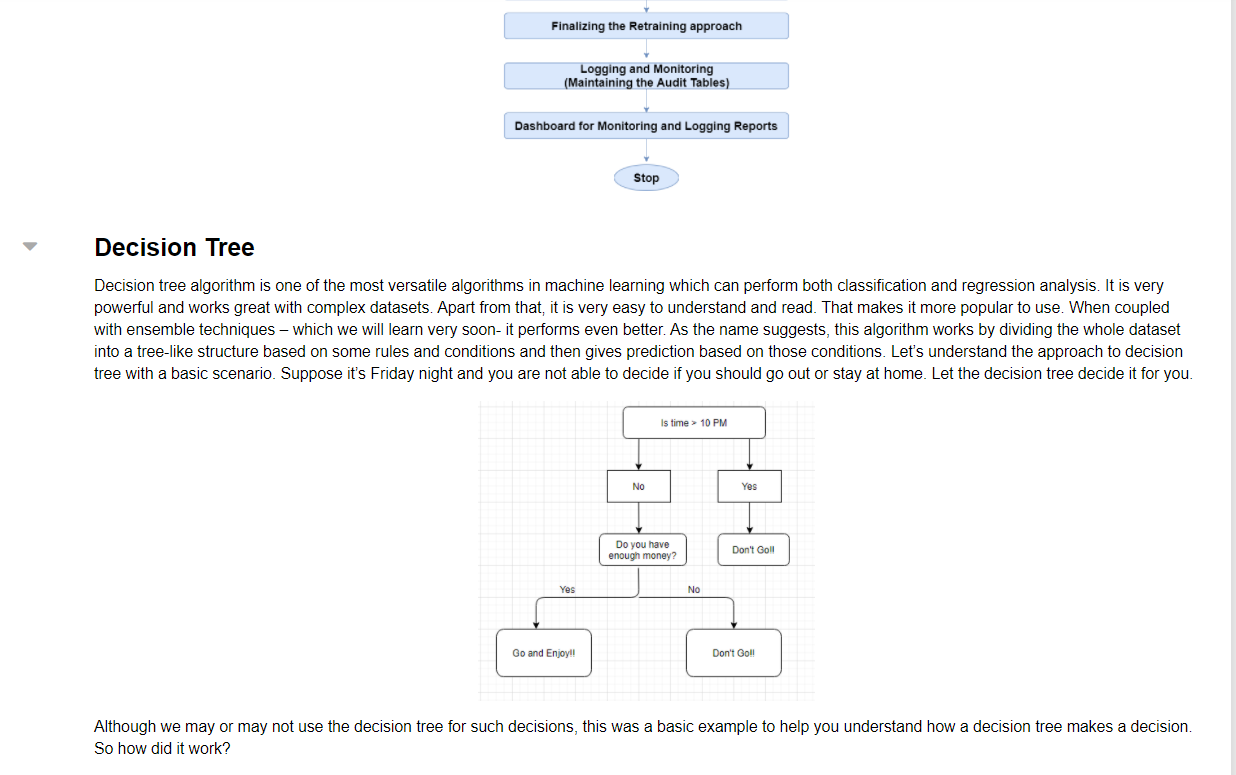
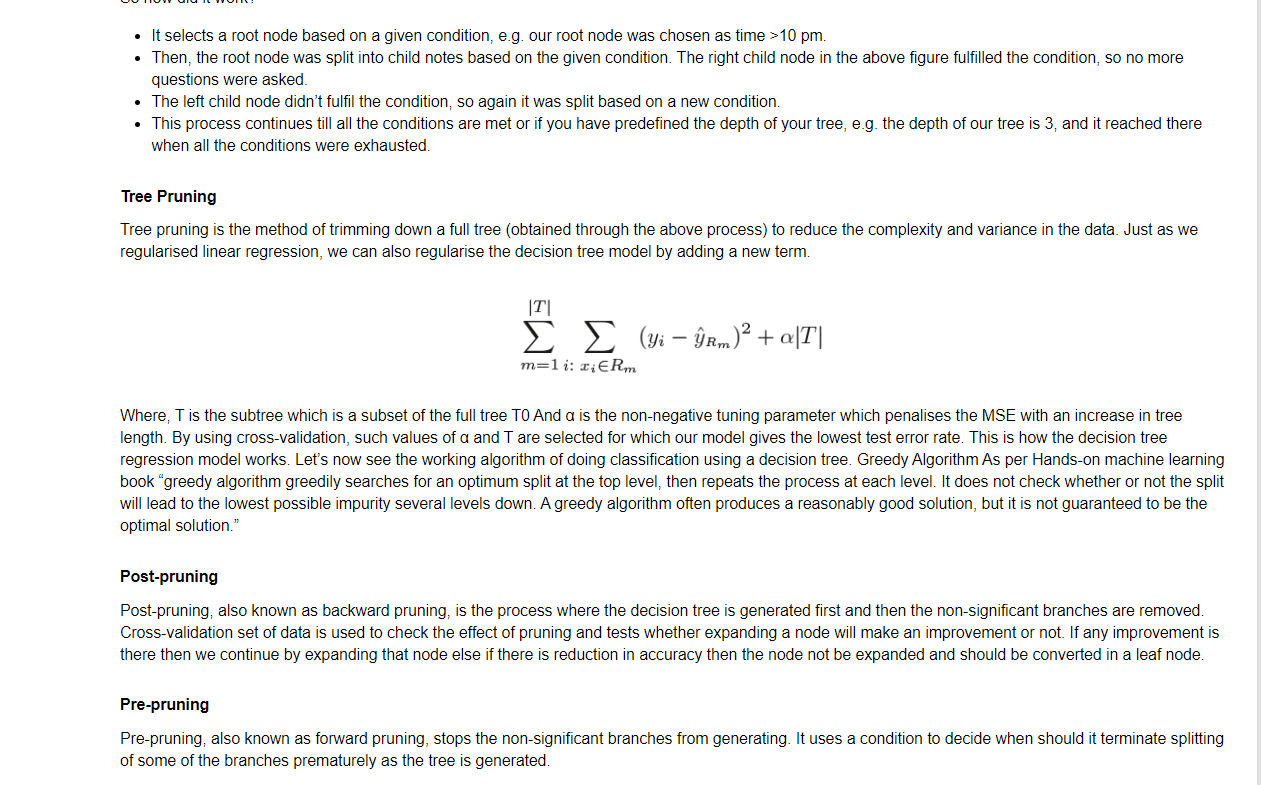
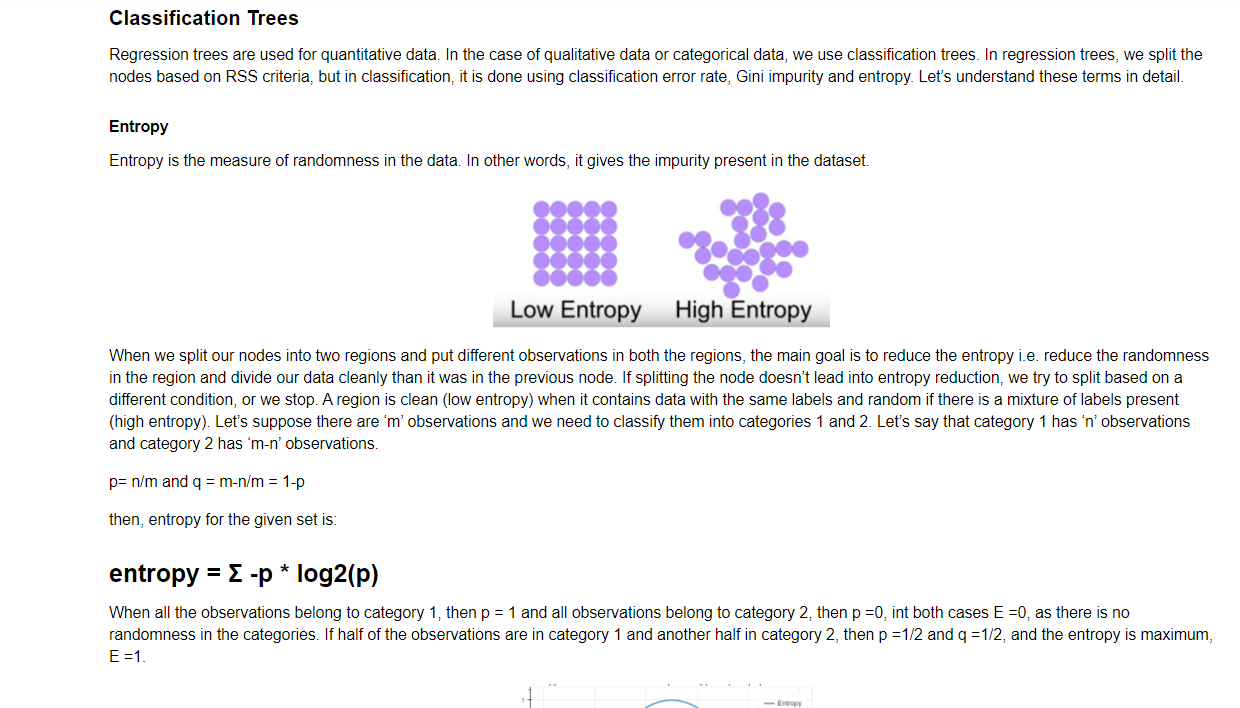
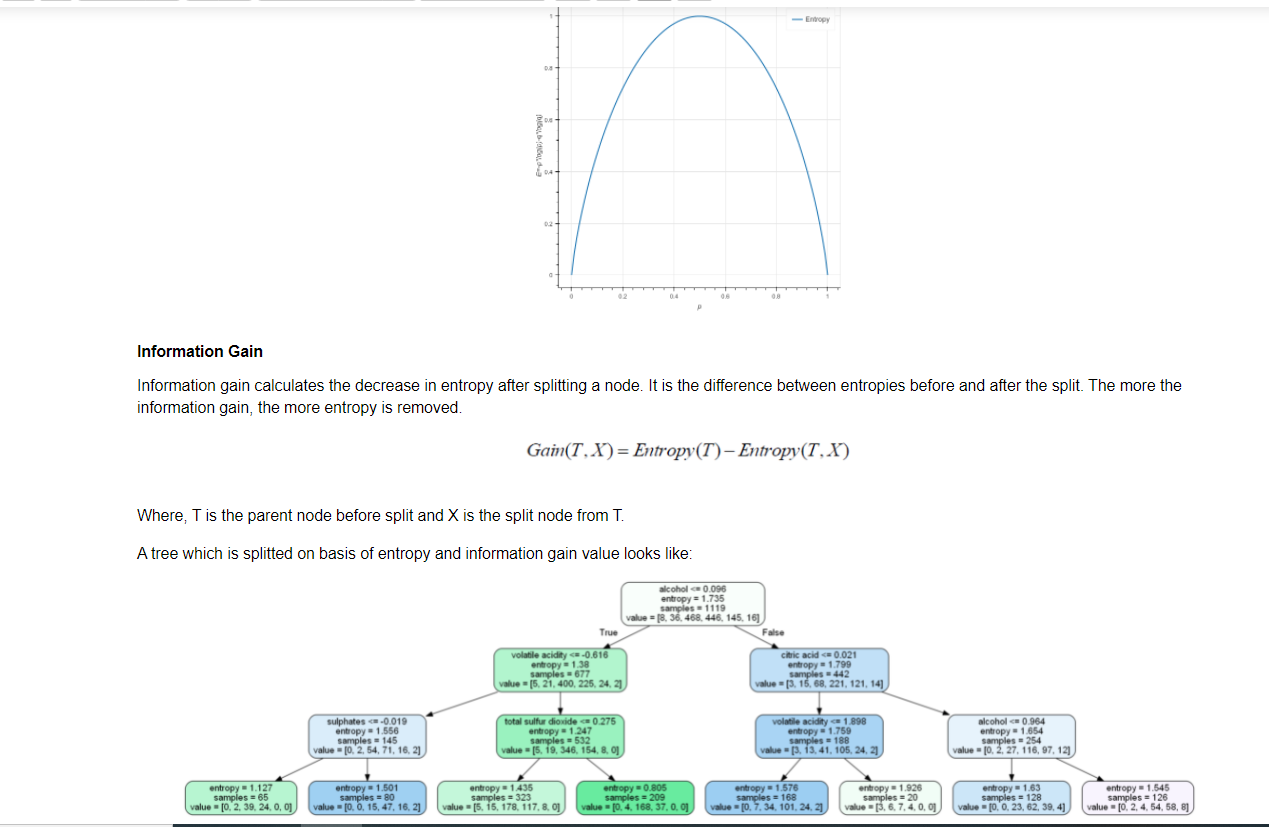
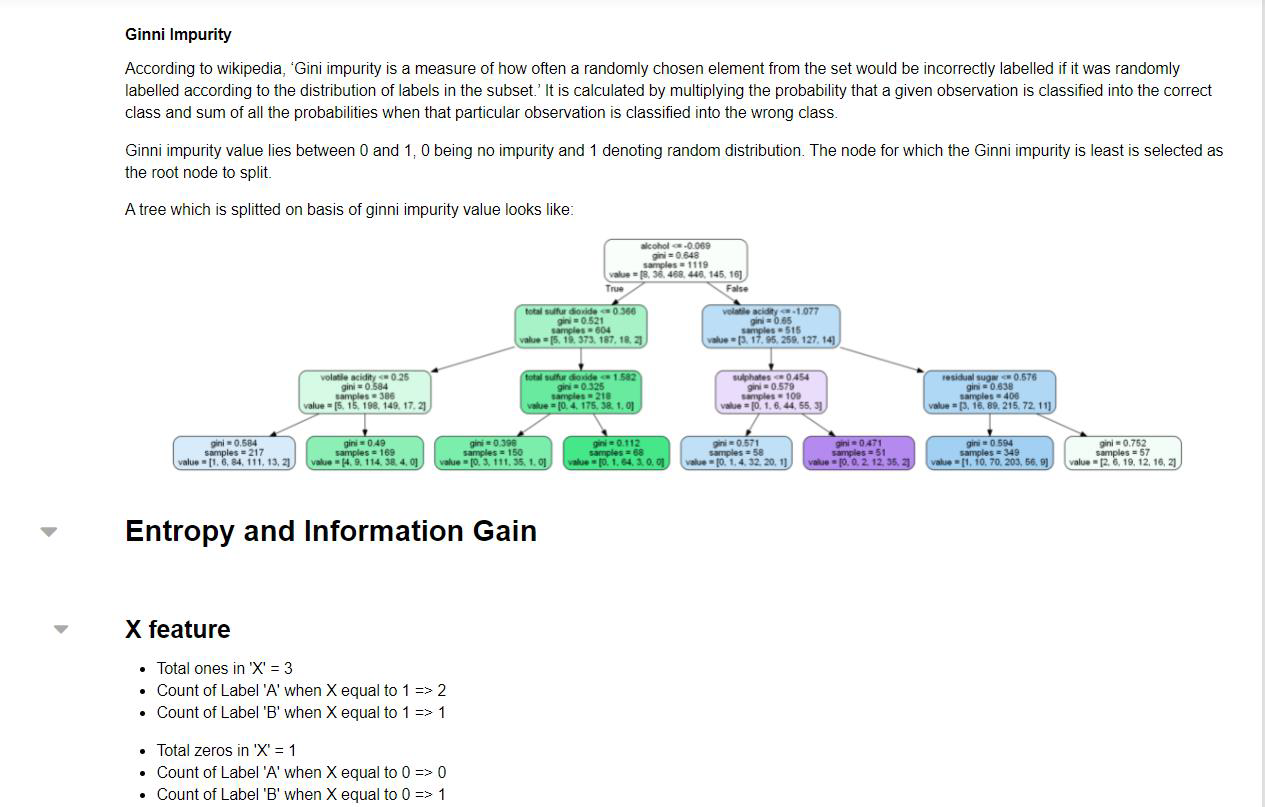
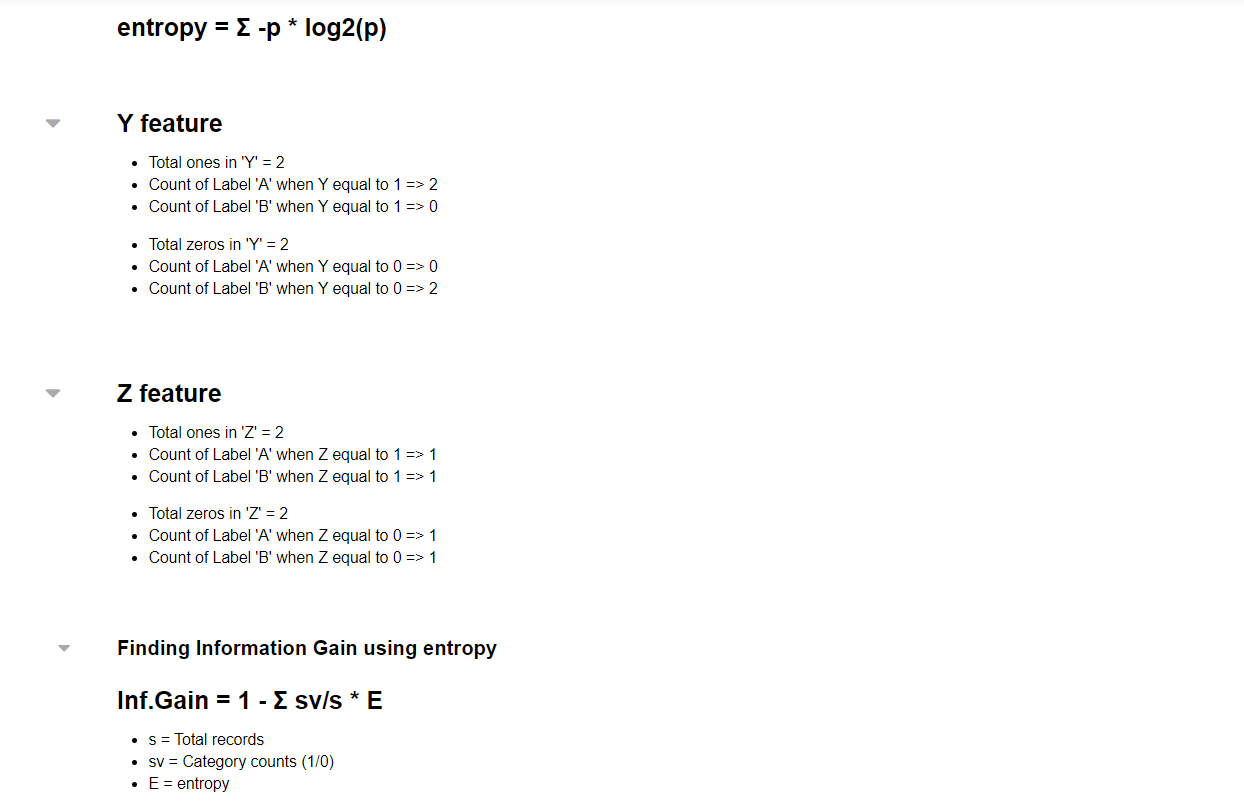
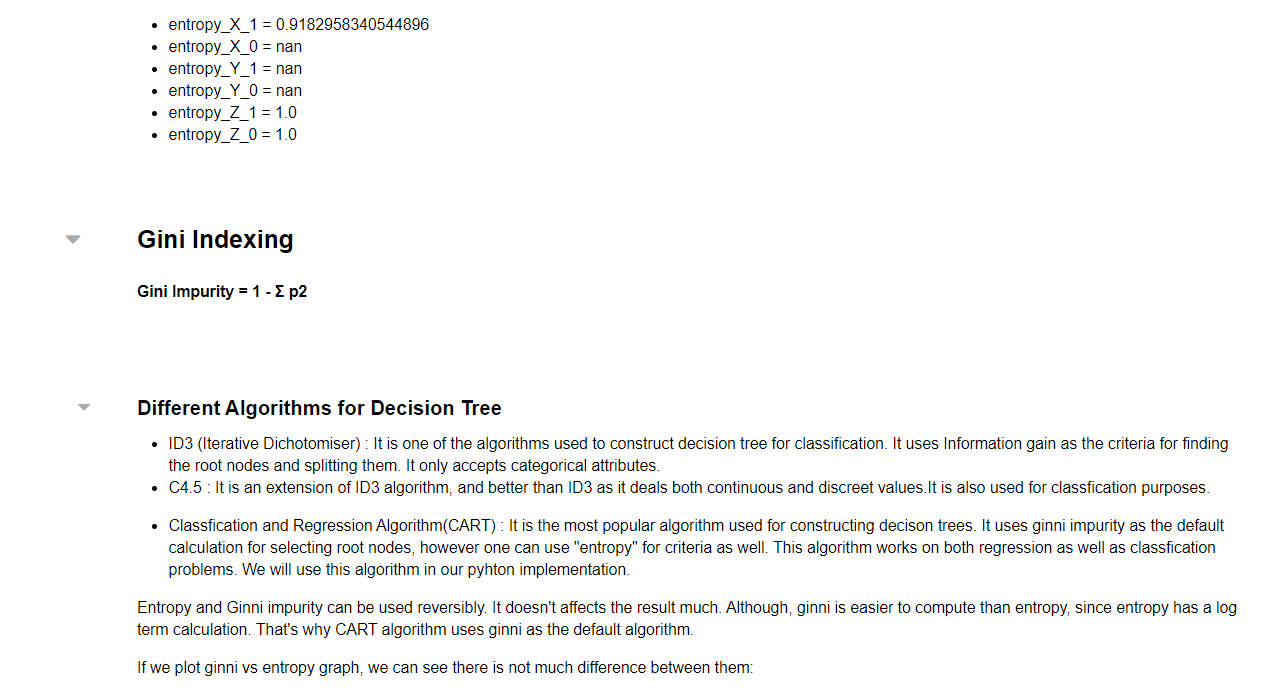
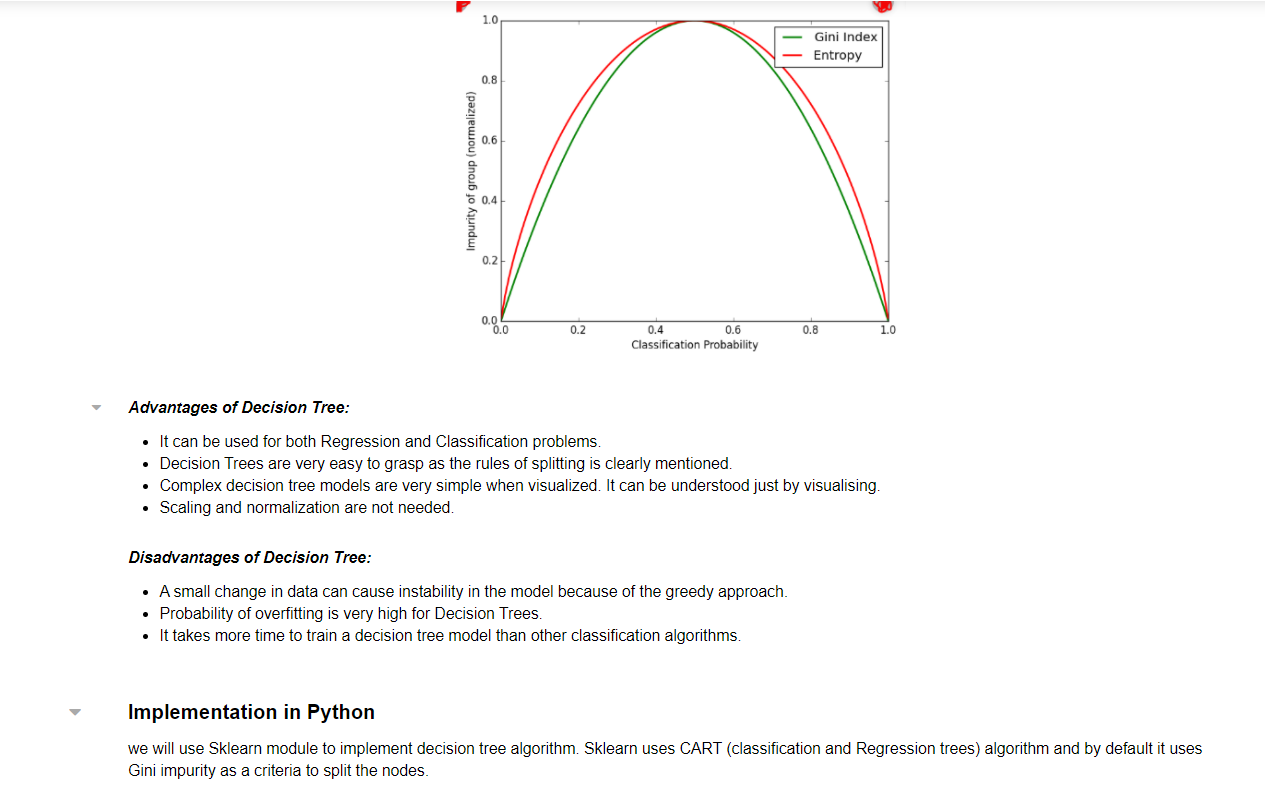
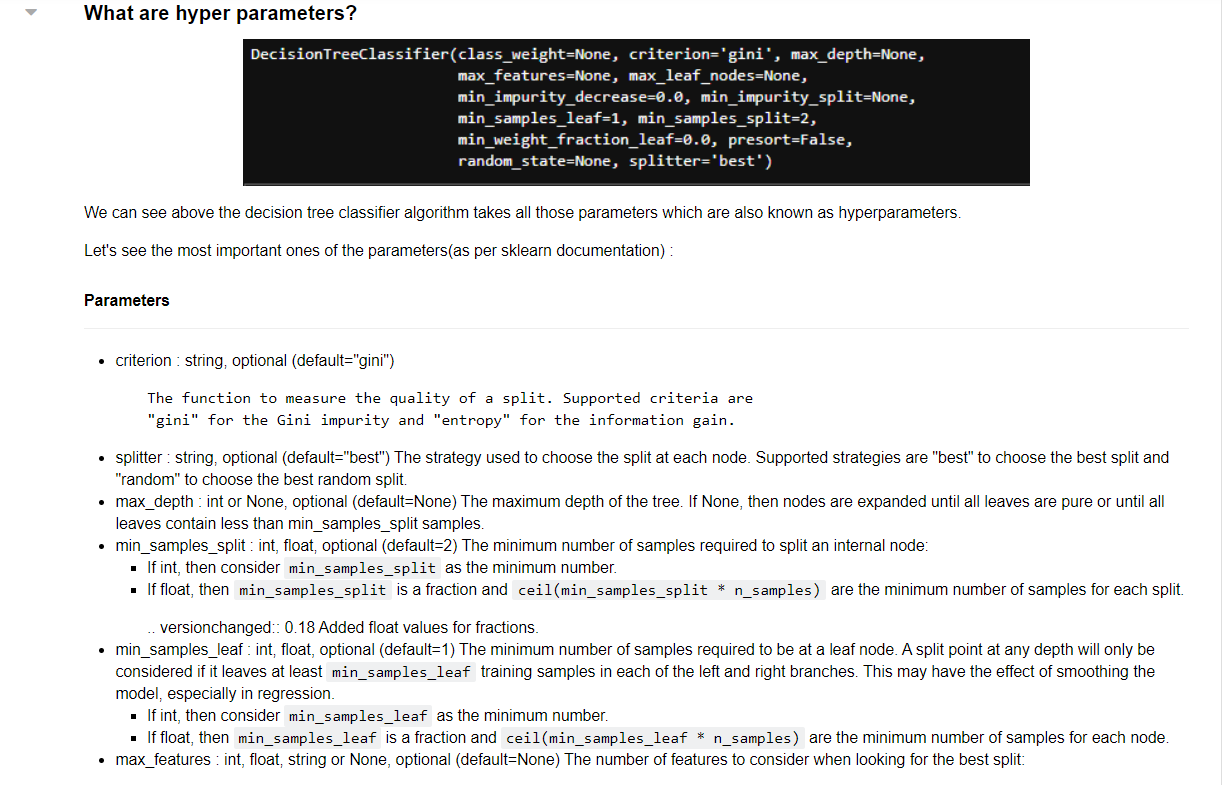

# Implementation in Python

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [5]:
# Any missing values?

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [6]:
data.shape

(1599, 13)

# We have categorical column (Alcohol_Content), we need to convert into numeric data using encoding method

content is following some order like Low,Med,High. We need to give weight according to the order

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
ord_encoder=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

# override alcohol content column with codes

In [9]:
data['Alcohol_content']=df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# Plotting Heatmap (Correlation matrix)

Let's try to see if we can reduce the features using different techniques.

Let's plot heatmap to visualize and find the coefficient of multicollinearity

<AxesSubplot:>

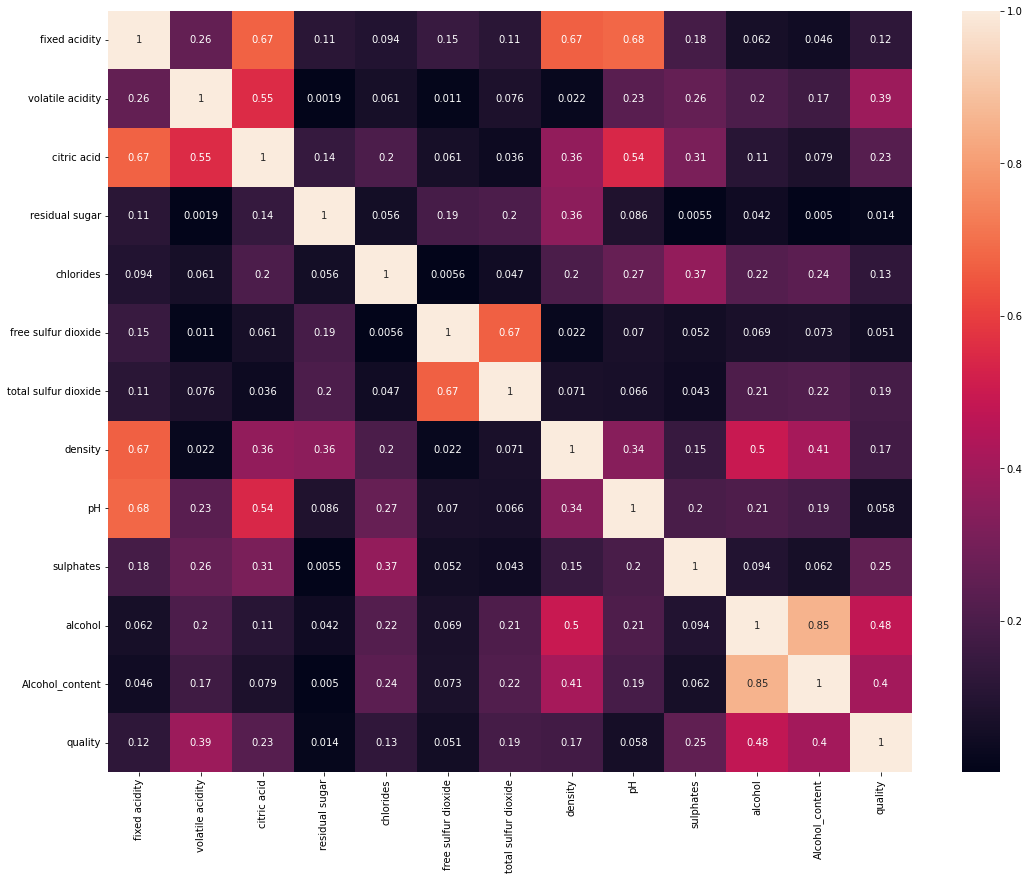

In [10]:
df_corr=data.corr().abs()  # This code will get the coefficient of one variable vs all other variable(Relationship)

plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size': 10})

seems like Alcohol_content and alcohol are correlated as per above heat map.But we need more proof

# Make sure they are really correlated (It should follow some trend)

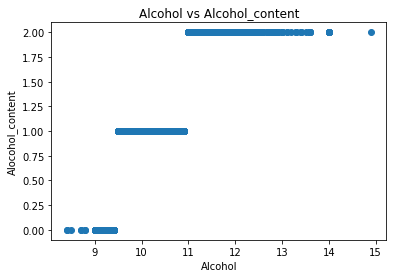

In [11]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alocohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

we see clear trend. As and when Alcohol level increases its content also increasing. so we can delete one of them.

In [12]:
x= data.drop(columns=['quality','Alcohol_content'])
y= data['quality']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=41)

In [14]:
# Let's first visualize the tree on the data without doing any pre processing

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Let's see hoe the tree looks like (This is nothing to do with algorithm/accuracy). It's just for visualization purpose

In [47]:
pip install ipython

In [15]:
feature_name=list(x.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [41]:
pip install "ipython[all]"

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib-inline in c:\users\user\anaconda3\lib\site-packages (from ipython[all]) (0.1.2)



In [1]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from Ipython.display import image
import pydotplus

#create a dot_file which stores the tree structure
dot_data=export_graphviz(clf,feature_names=feature_name,rounded= True, filled= True)

# draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")

# show graph
Image(graph.create_png())

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

In [71]:
clf.score(x_train,y_train)  # This is Training score

0.8348623853211009

In [72]:
y_pred=clf.predict(x_test)

# check the accuracy 
accuracy_score(y_test,y_pred)

0.6075

#  Let's now try to tune some hyperparameters using the GridSearchCV algorithm

In [73]:
# we are tuning four Important hyperparameters right now, we are passing the different values parameters 

grid_param={
     'criterion':['gini','entropy'],
     'max_depth': range(10,15),               # The maximum depth of the tree
     'min_samples_leaf' : range(2,10),         # The minimumn number of samples required to be at a leaf node.
     'min_samples_split': range(3,10),        # The minimum number of sample required to split an internal node
     'max_leaf_nodes': range(5,10)             # Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes
 }

In [74]:
grid_search=GridSearchCV(estimator=clf,
                    param_grid=grid_param,
                        
                        cv=5,
                        n_jobs= -1)   # use all the cores in your system. For performance improvement.

In [75]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [76]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [77]:
clf=DecisionTreeClassifier(criterion= 'gini',min_samples_split=3, max_depth=10,min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [78]:
y_pred=clf.predict(x_test)
# Check the accuracy
accuracy_score(y_test,y_pred)

0.61

# Please Note - when you tune all the parameters there is a very good chance that, you can improve the accuracy
since other parameters are default , this combination is not giving better result. you can play around with other numbers to improve the accuracy.
Let's visualize the final tree:

In [79]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [81]:
#Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [90]:
conda install -c anaconda graphviz


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\USER\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       haa95532_2         151 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_0         155 KB  anaconda
    conda-4.12.0               |   py39haa95532_0        17.0 MB  anaconda
    graphviz-2.38              |       hfd603c8_2        37.7 MB  anaconda
    openssl-1.1.1l             |       h2bbff1b_0         5.7 MB  anaconda
    ------------------------------------------------------------




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/openssl-1.1.1l-h2bbff1b_0.tar.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/graphviz-2.38-hfd603c8_2.tar.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/certifi-2021.10.8-py39haa95532_0.tar.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple 

                                           Total:        60.7 MB

The following NEW packages will be INSTALLED:

  graphviz           anaconda/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> anaconda::conda-4.12.0-py39haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda




conda-4.12.0         | 17.0 MB   |            |   0% 
conda-4.12.0         | 17.0 MB   |            |   0% 
conda-4.12.0         | 17.0 MB   |            |   0% 
conda-4.12.0         | 17.0 MB   |            |   0% 
conda-4.12.0         | 17.0 MB   |            |   0% 
conda-4.12.0         | 17.0 MB   |            |   1% 
conda-4.12.0         | 17.0 MB   |            |   1% 
conda

In [2]:
feature_name=list(x.columns)
class_name=list(y_train.unique())

# create a dot_file which stores the tree structure
dot_data=export_graphviz(clf,rounded=True,filled=True)

#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree_hype_png")
#show graph
Image(graph.create_png())

NameError: name 'x' is not defined